In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import np_utils
import matplotlib.pyplot as plt

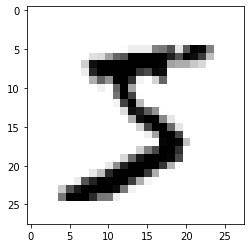

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

digitImage = train_images[0]
plt.imshow(digitImage, cmap=plt.cm.binary)
plt.show()

In [3]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
train_labels = np_utils.to_categorical(train_labels)

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
test_labels = np_utils.to_categorical(test_labels)

In [4]:
# 28 * 28 = 784 inputs
# 512 * 784 = 401408 weights + 512 biases = 401920 params
# 512 * 10 = 5120 + 10 biases = 5130 params
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
print(network.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
network.compile(
    loss='categorical_crossentropy', metrics=['accuracy'], optimizer='rmsprop'
)

In [6]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2570 - accuracy: 0.9253
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1038 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0680 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0501 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0372 - accuracy: 0.9887


In [9]:
network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 576us/step - loss: 0.0672 - accuracy: 0.9800


[0.06721357256174088, 0.9800000190734863]